In [3]:
from variance_utils import *

In [4]:
session = 757216464

## Drifting gratings

In [5]:
stimulus_type = 'drifting'
frequency = 'temporal_frequency'

In [6]:
raw_dataset = pd.read_parquet(f'../ourdata/{stimulus_type}_dataset_session_{session}.parquet')
raw_dataset

,stimulus_presentation_id,unit_id,stimulus_name,temporal_frequency,orientation,spikes_per_second,area
index,,,,,,,
0,3798,951797083,drifting_gratings,1.0,90.0,30.474706,MGm
1,3798,951797141,drifting_gratings,1.0,90.0,2.997512,MGm
2,3798,951797185,drifting_gratings,1.0,90.0,20.482999,MGm
3,3798,951797219,drifting_gratings,1.0,90.0,0.499585,MGm
4,3798,951797253,drifting_gratings,1.0,90.0,4.995853,MGm
...,...,...,...,...,...,...,...
516518,49432,951820363,drifting_gratings,8.0,180.0,5.495356,VISal
516519,49432,951820428,drifting_gratings,8.0,180.0,14.987336,PO
516520,49432,951820436,drifting_gratings,8.0,180.0,12.989024,PO


In [7]:
analysed_dataset = pd.read_parquet(f'../ourdata/df_{stimulus_type}_session_{session}.parquet')
analysed_dataset

,stimulus_presentation_id,area,temporal_frequency,orientation,active
0,3798,APN,1.0,90.0,1
1,3798,CA1,1.0,90.0,1
2,3798,CA3,1.0,90.0,0
3,3798,DG,1.0,90.0,1
4,3798,Eth,1.0,90.0,0
...,...,...,...,...,...
13785,49432,VISal,8.0,180.0,1
13786,49432,VISam,8.0,180.0,1
13787,49432,VISl,8.0,180.0,0
13788,49432,VISp,8.0,180.0,0


### Unit-level analysis

In [8]:
# we compute the variance of the spikes per second for each unit
variances_units = compute_dataset_variance(raw_dataset, frequency)

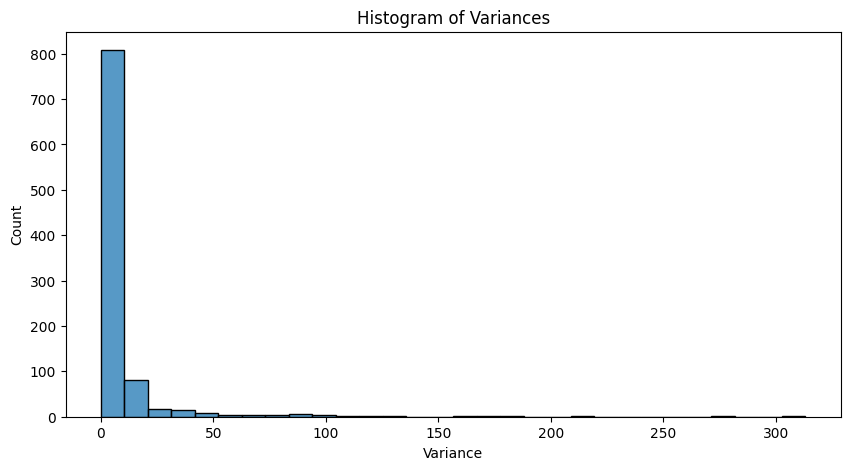

In [9]:
# we plot the histogram of the variances to see how they are distributed
histogram_variances(variances_units)

we see that most of the units have low variance. we are only interested in the units which have a higher variance so we keep only those:

In [10]:
# top 5% units with most variance
top_5_percent_variances = top_variances(variances_units, 0.05)

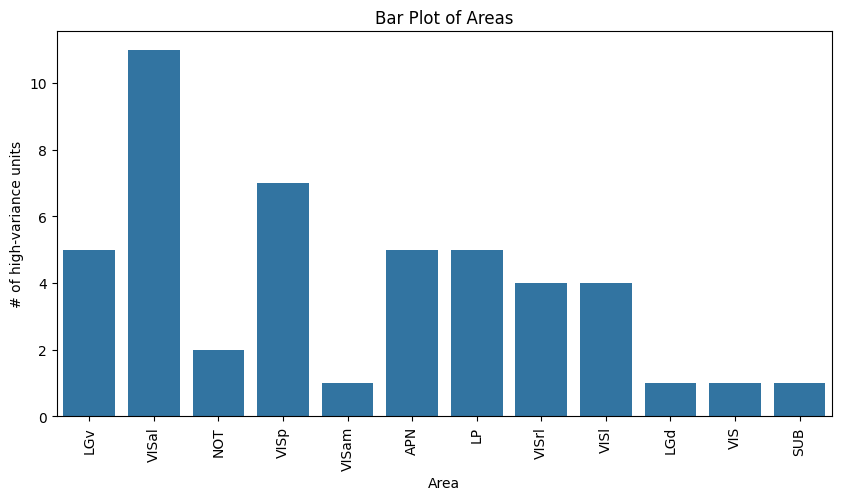

In [11]:
# we not create a dictionary with the areas of the top 5% units and their frequency
areas = get_area_frequency(raw_dataset, top_5_percent_variances.keys())
bar_plot_areas(areas)

In [12]:
# get the top areas
sorted_areas = sorted(areas.items(), key=lambda x: x[1], reverse=True)
top_areas = [area[0] for area in sorted_areas[:5]]
# we print the top areas
print('Areas with the highest number of high-variance neurons:', top_areas)

Areas with the highest number of high-variance neurons: ['VISal', 'VISp', 'LGv', 'APN', 'LP']


Area: VISal


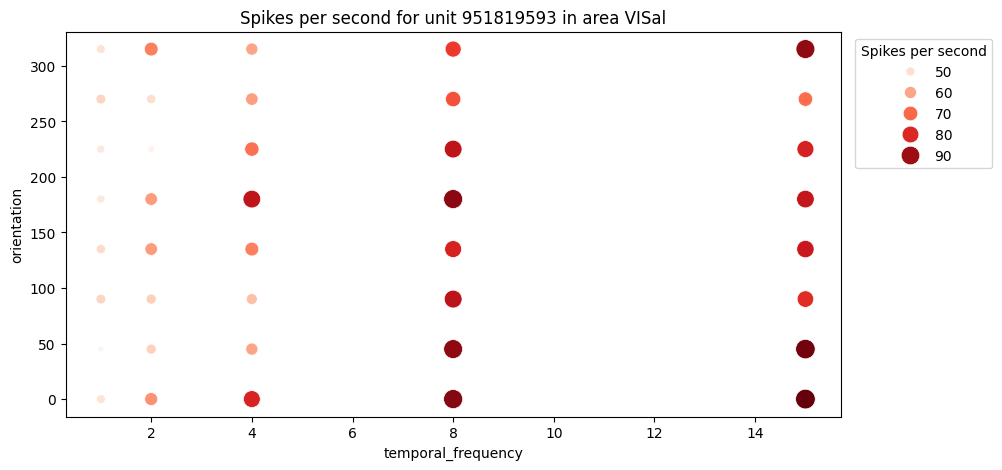

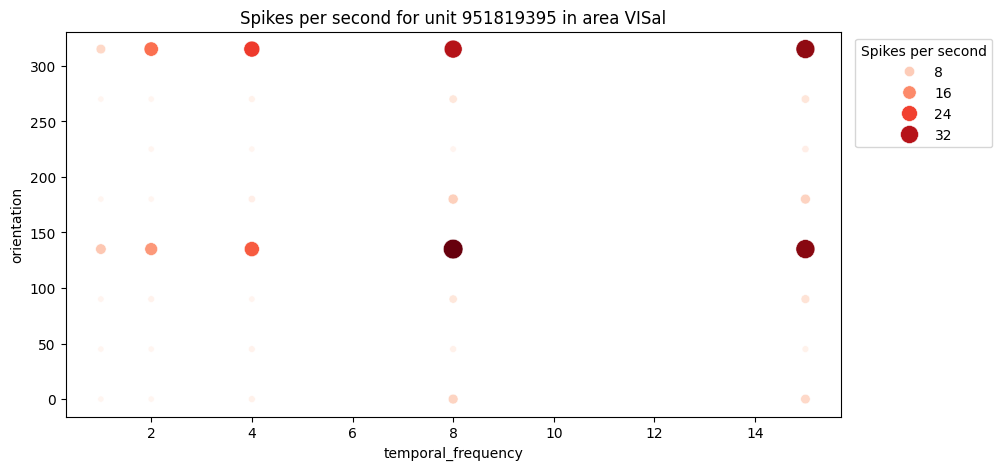

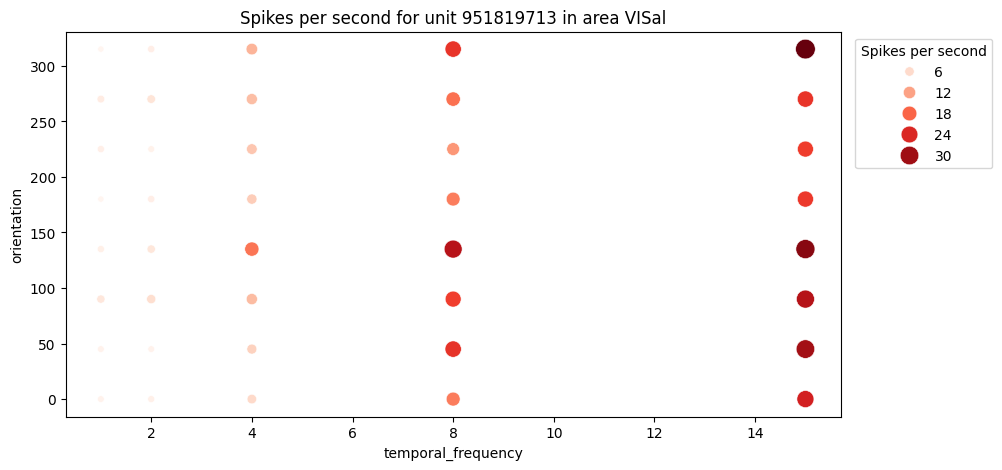

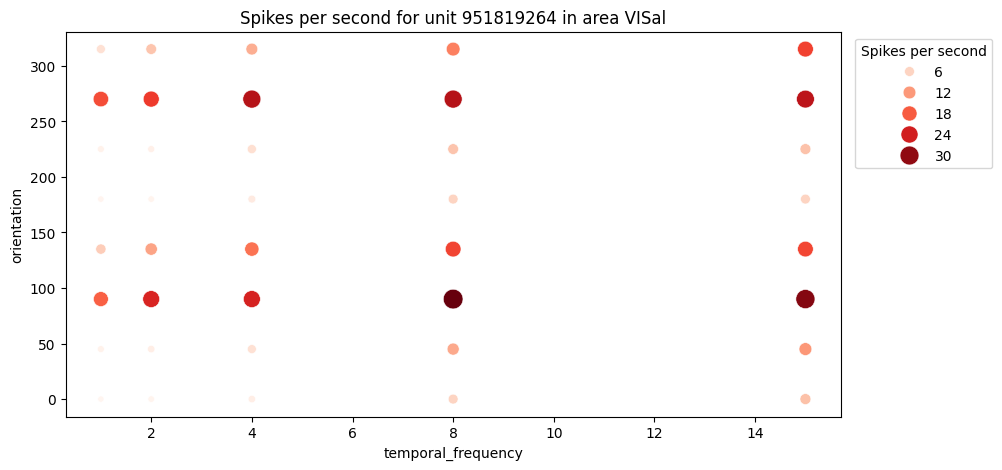

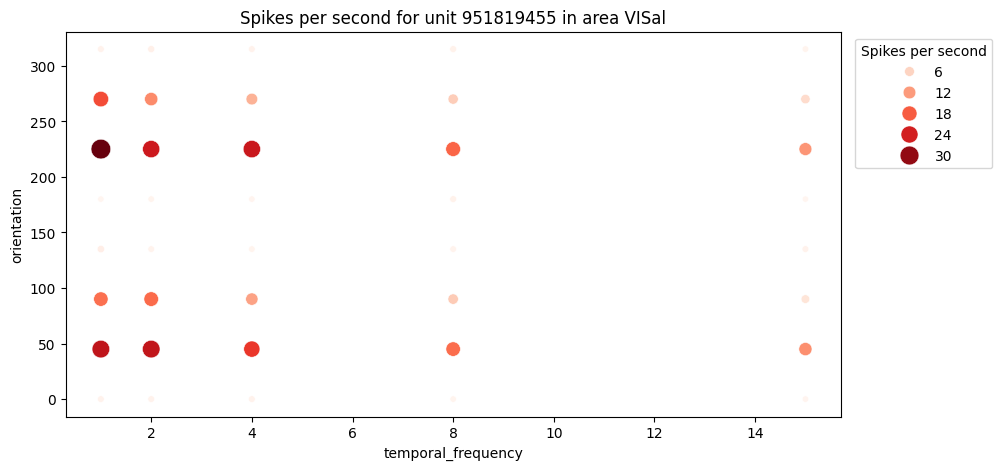

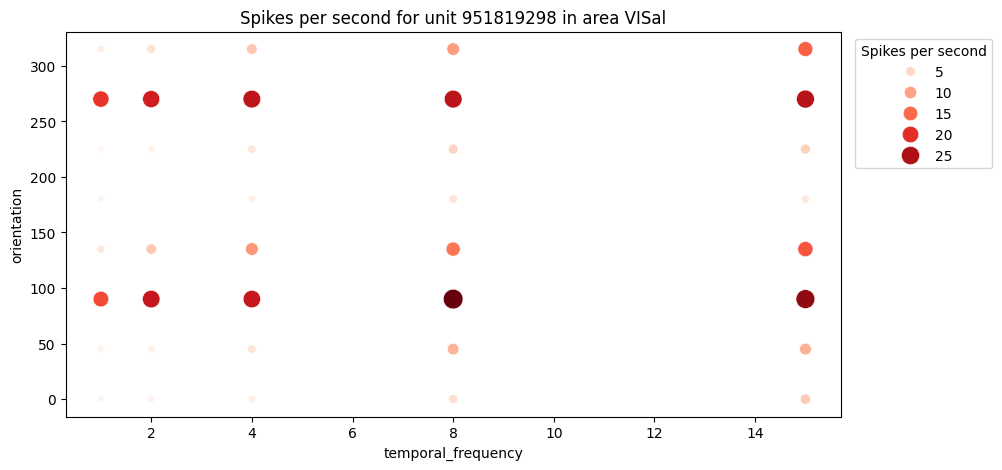

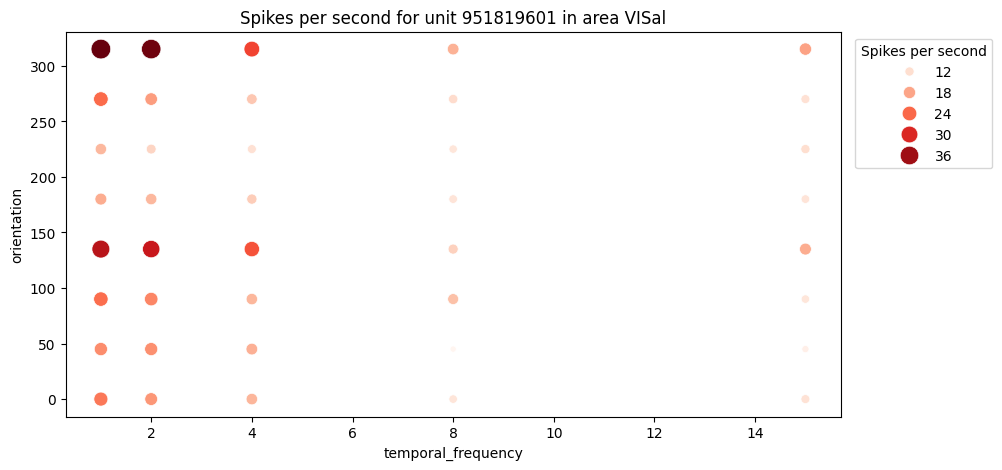

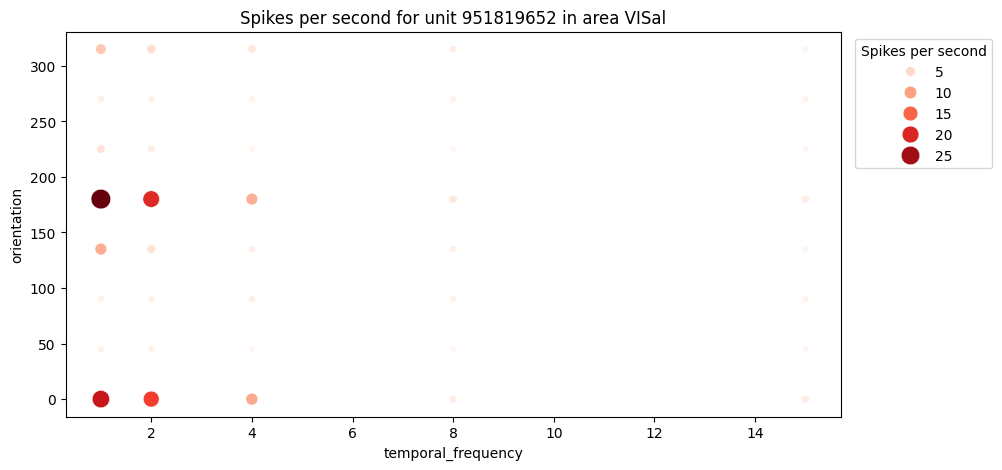

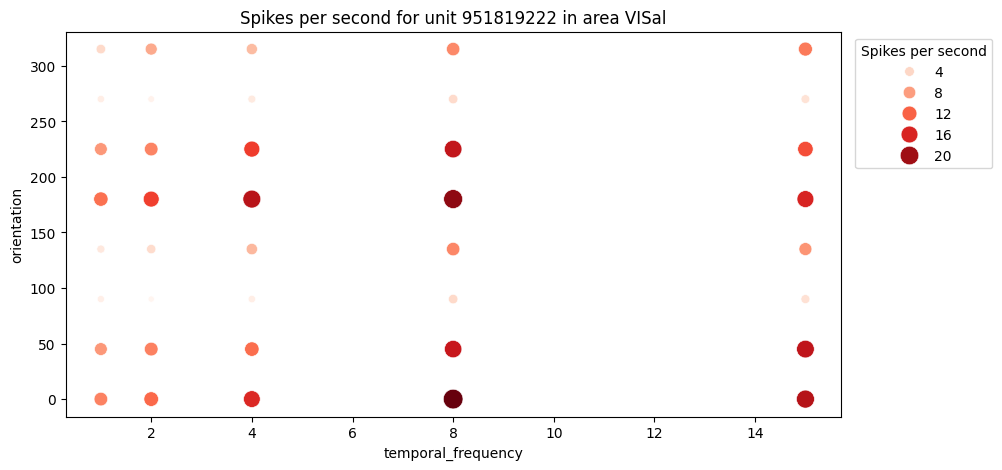

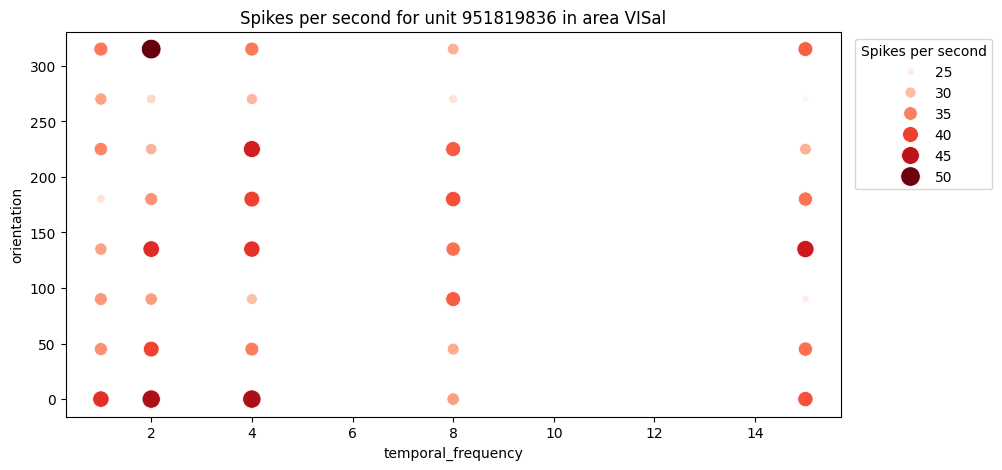

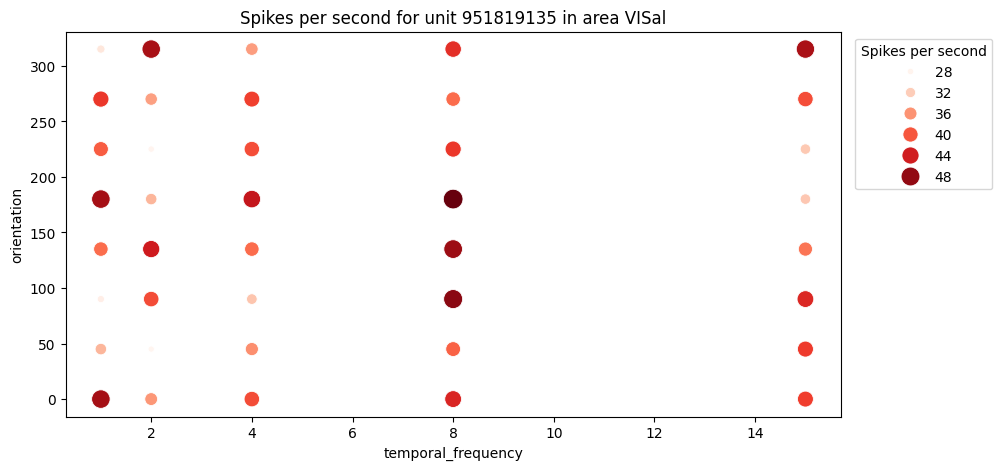

Area: VISp


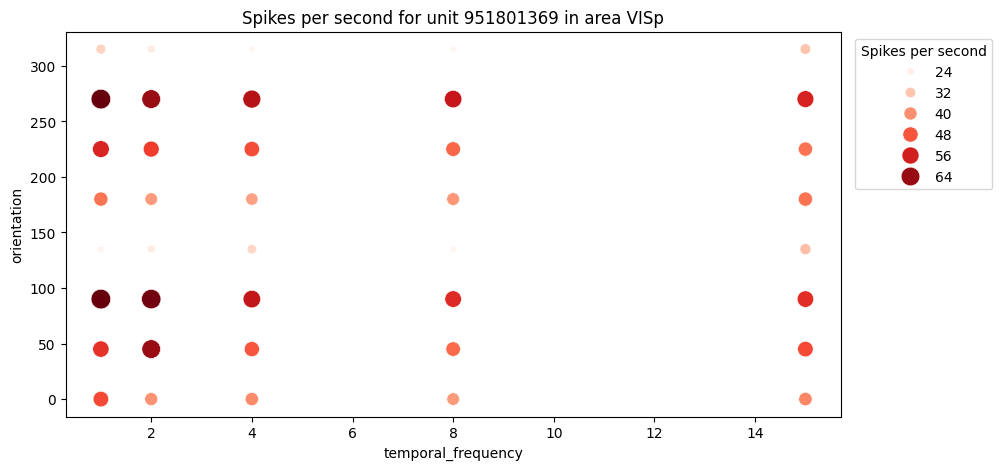

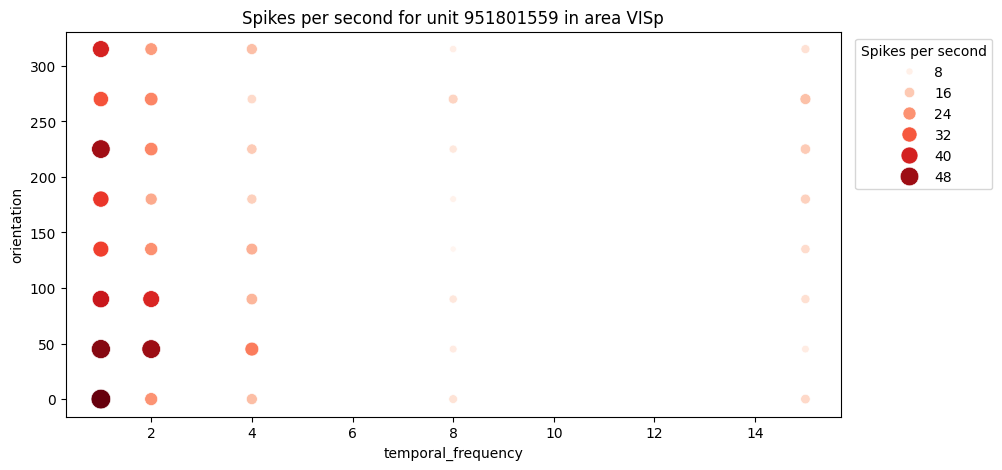

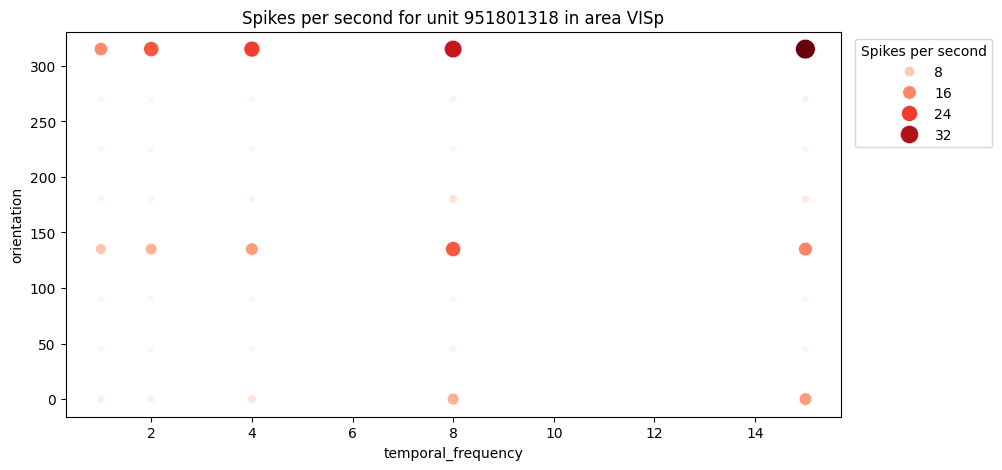

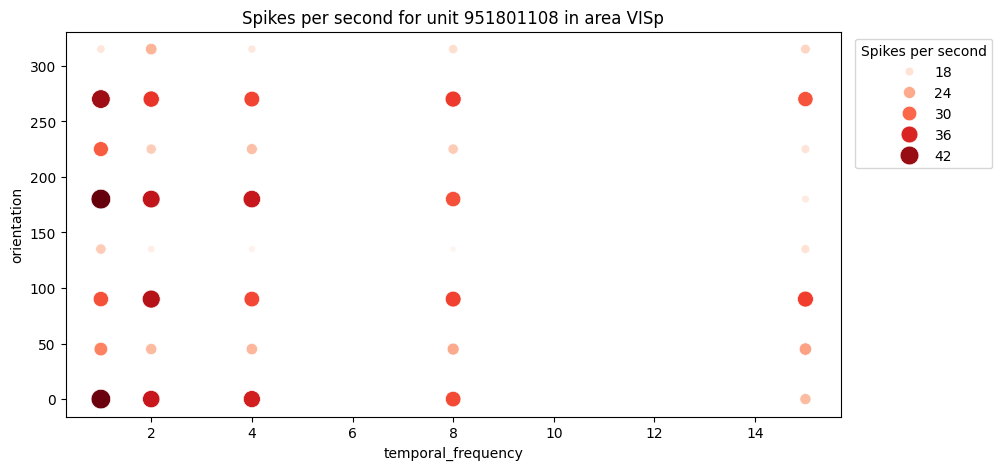

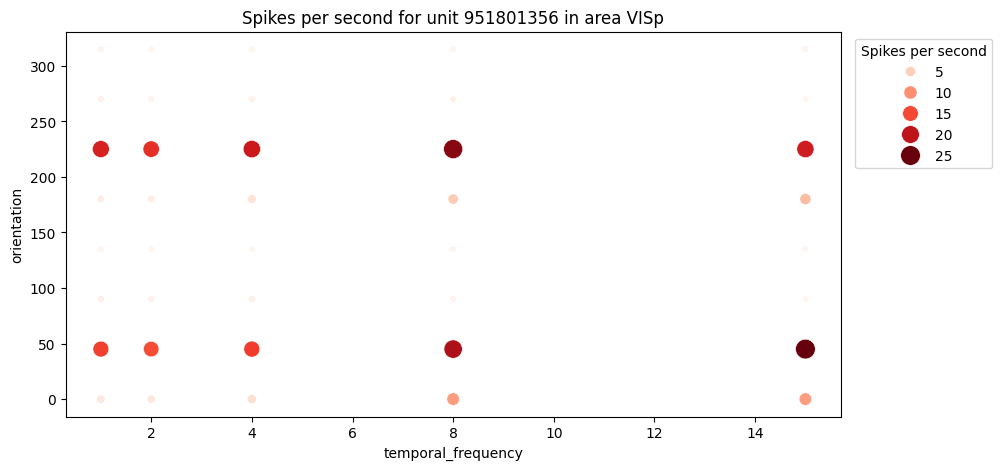

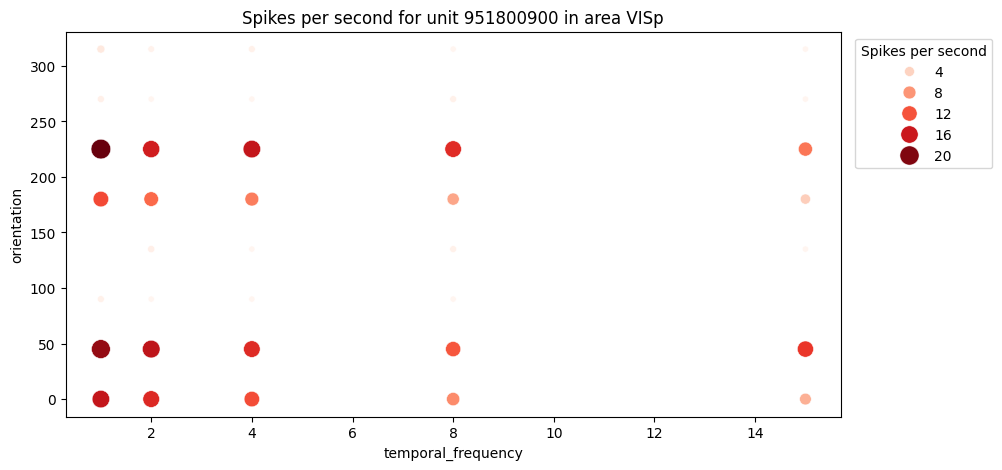

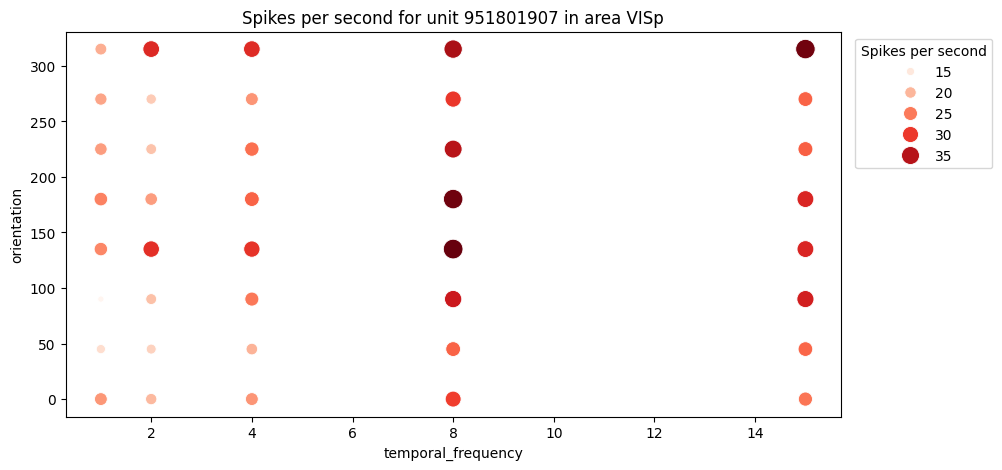

Area: LGv


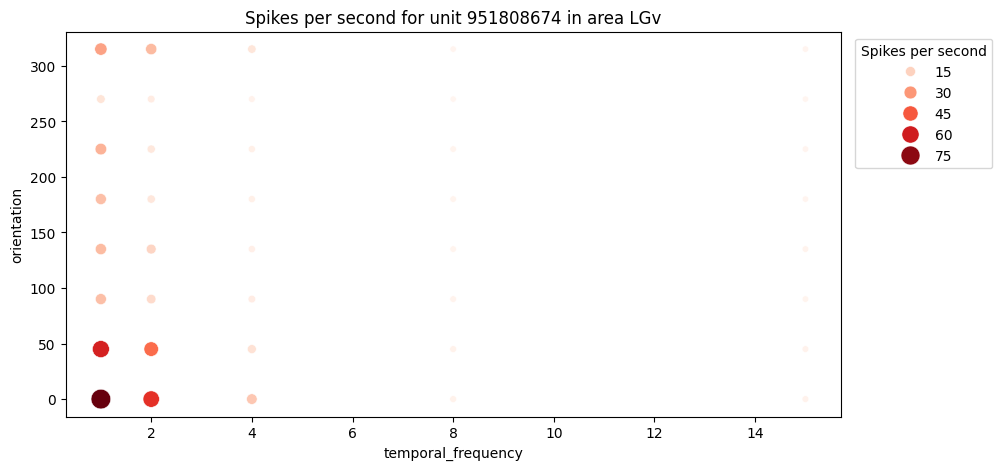

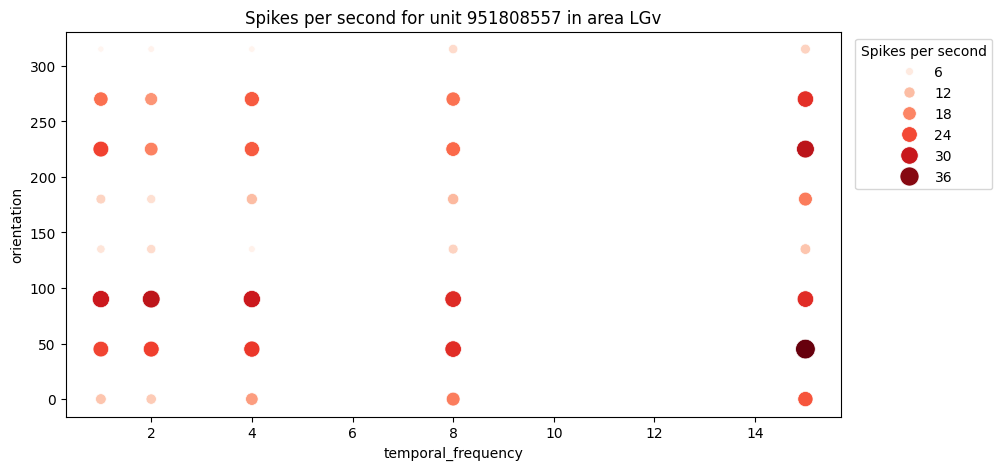

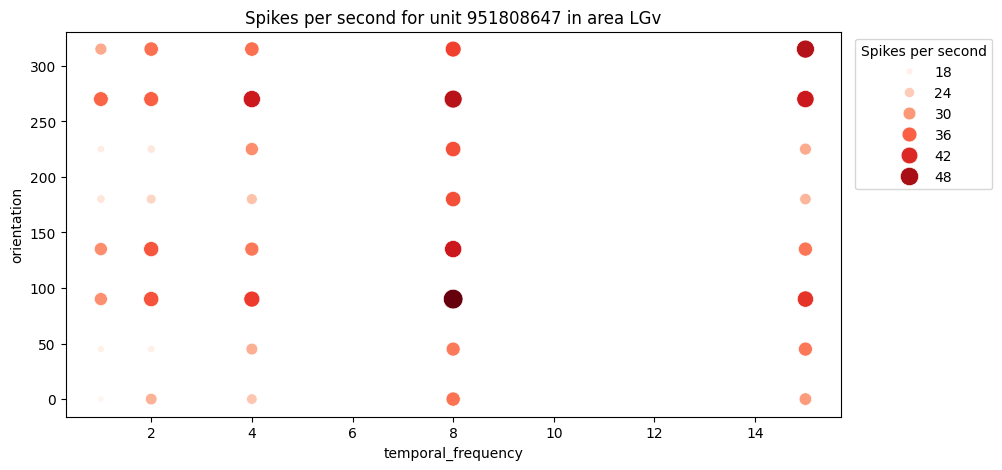

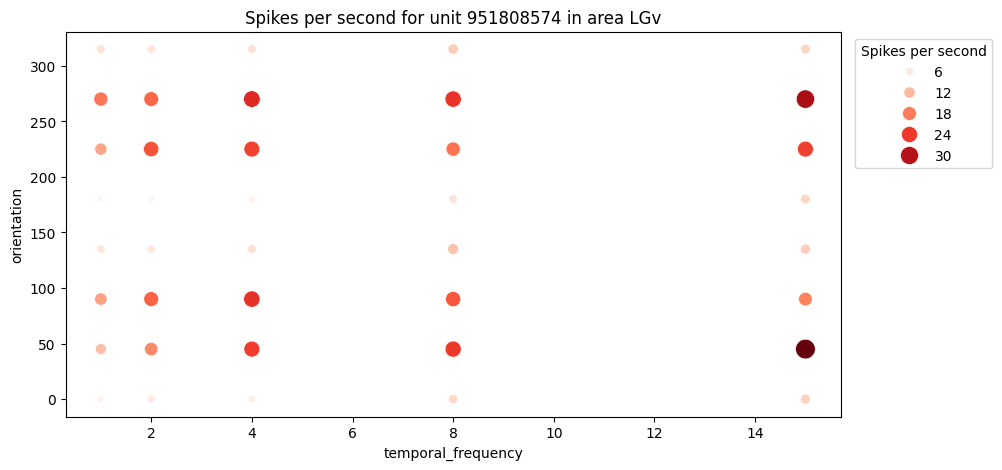

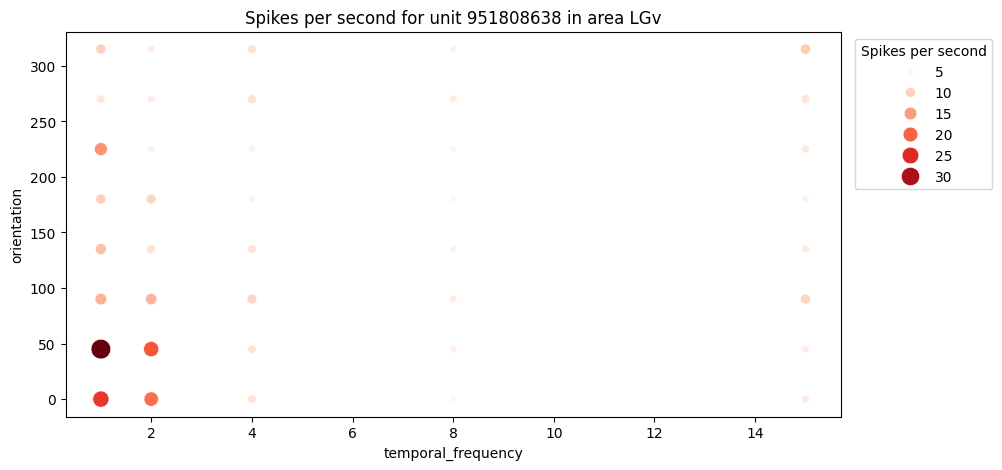

Area: APN


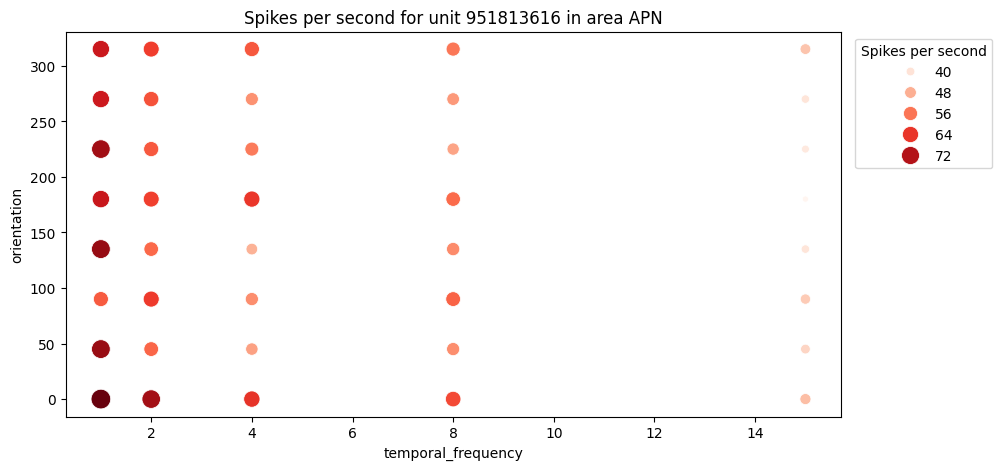

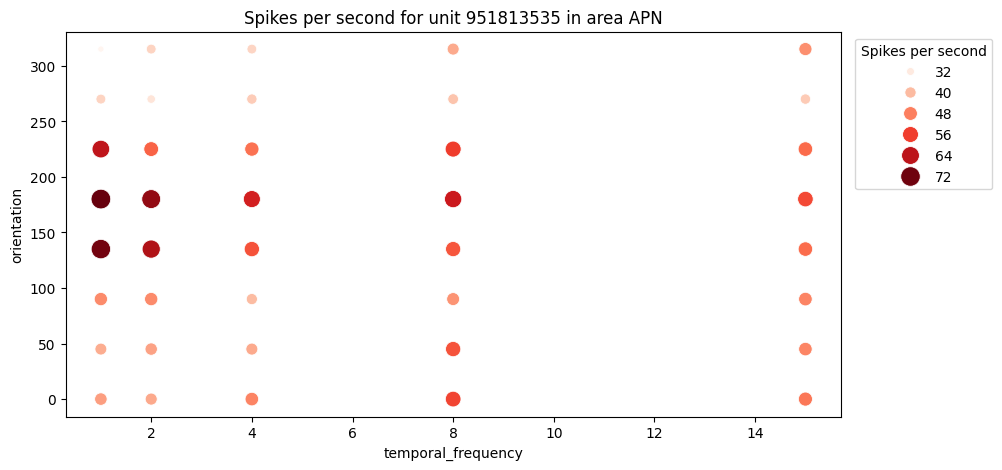

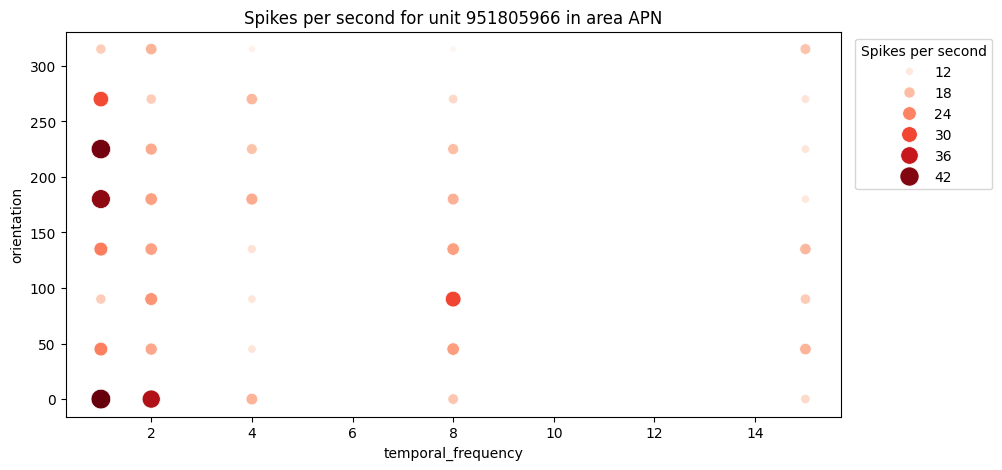

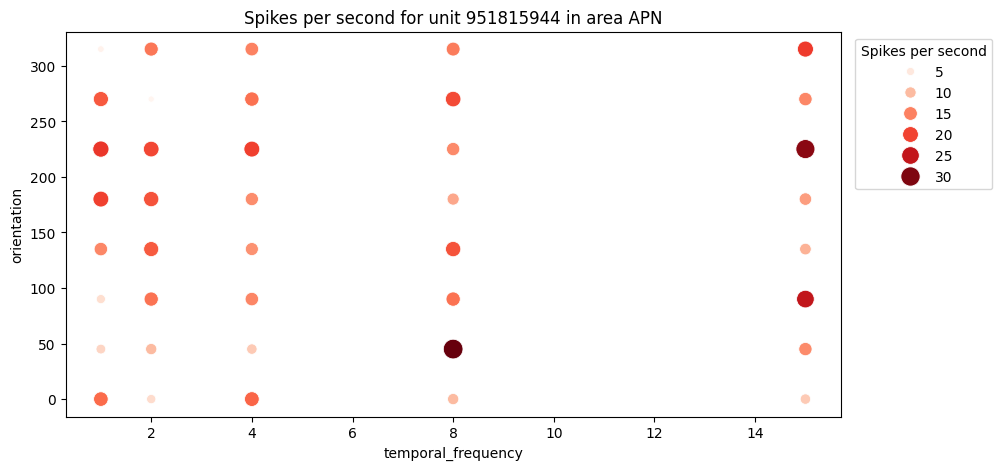

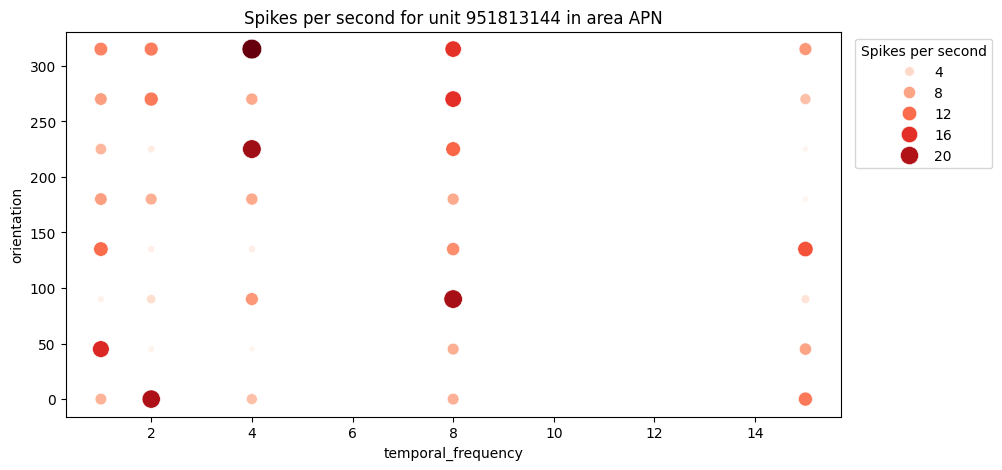

Area: LP


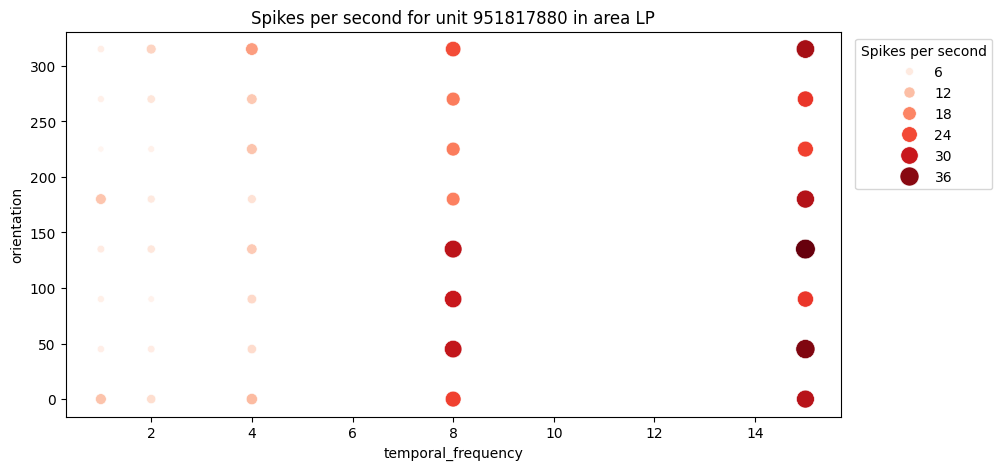

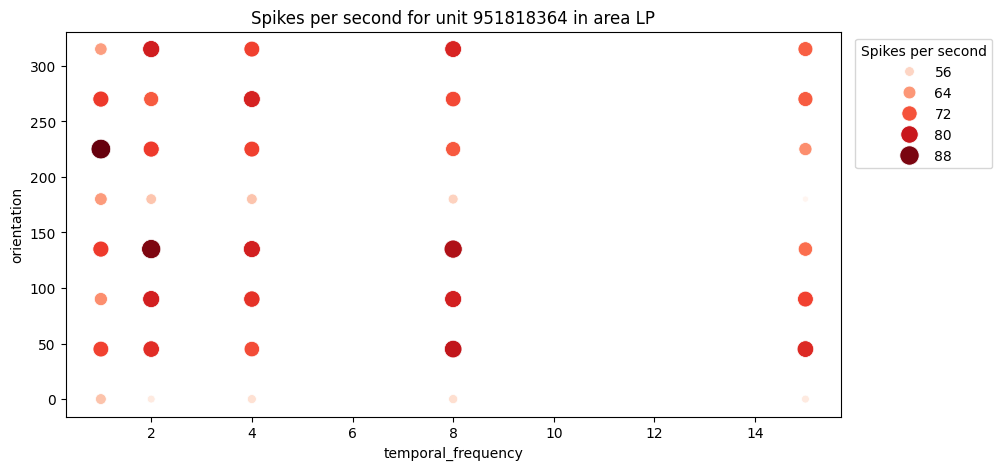

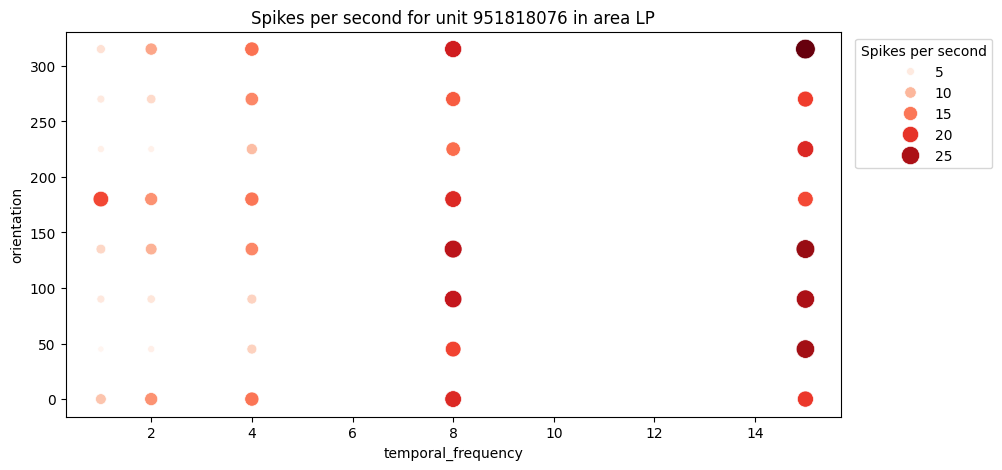

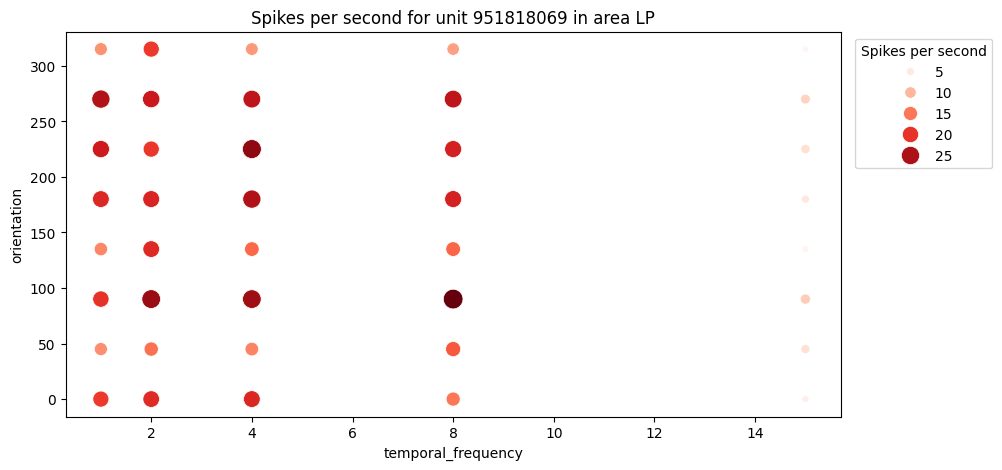

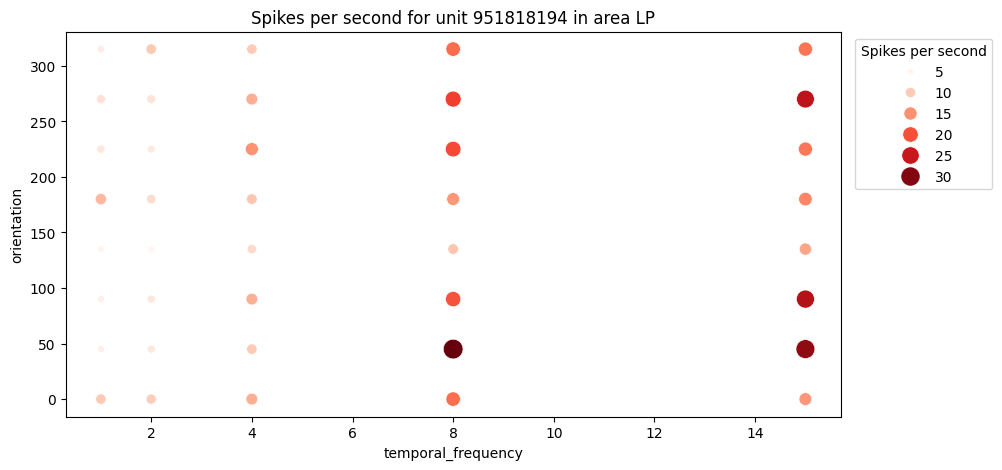

In [13]:
# Group units by their areas
units_by_area = {}
for unit in top_5_percent_variances.keys():
    area = get_unit_area(raw_dataset, unit)
    if area in top_areas:
        if area not in units_by_area:
            units_by_area[area] = []
        units_by_area[area].append(unit)

# Plot units in order of their areas
for area in top_areas:
    if area in units_by_area:
        print(f'Area: {area}')
        for unit in units_by_area[area]:
            plot_unit_spikes_per_second(raw_dataset, unit, frequency)

### Area-level analysis

In [14]:
variances_areas = compute_dataset_variance_area(raw_dataset, frequency)

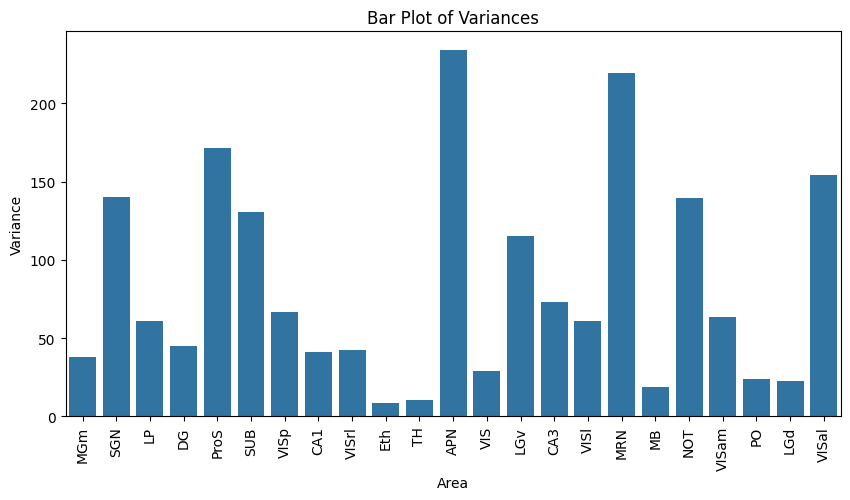

In [15]:
bar_plot_variances(variances_areas)

In [16]:
sorted_areas = sorted(variances_areas.items(), key=lambda x: x[1], reverse=True)
top_areas_variances = [area[0] for area in sorted_areas[:4]]
print('Areas with the highest variance:', top_areas_variances)

Areas with the highest variance: ['APN', 'MRN', 'ProS', 'VISal']


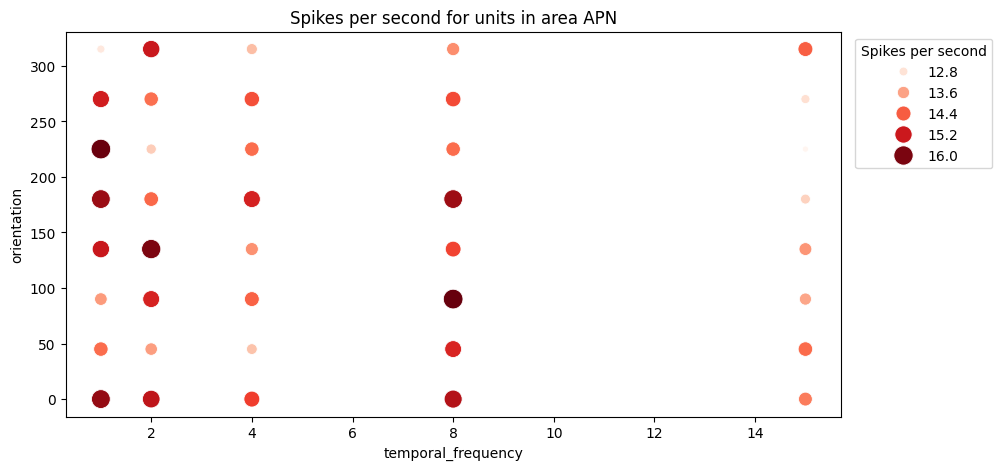

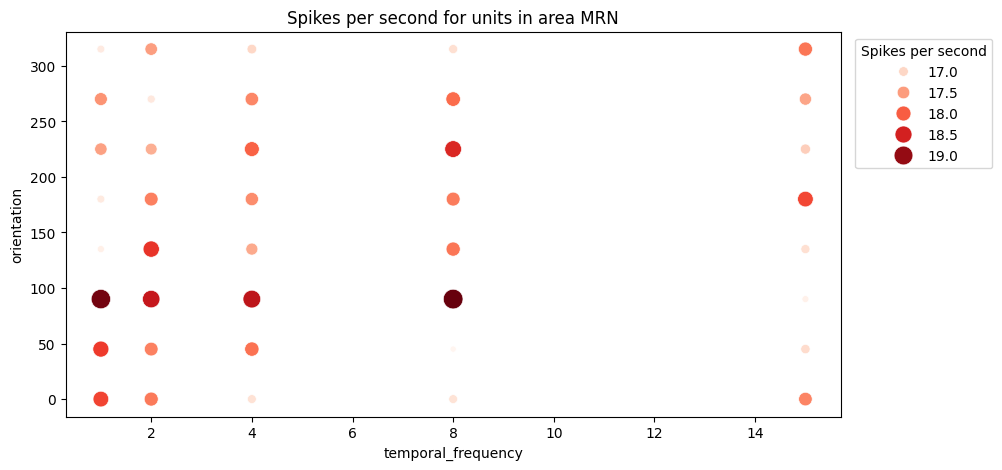

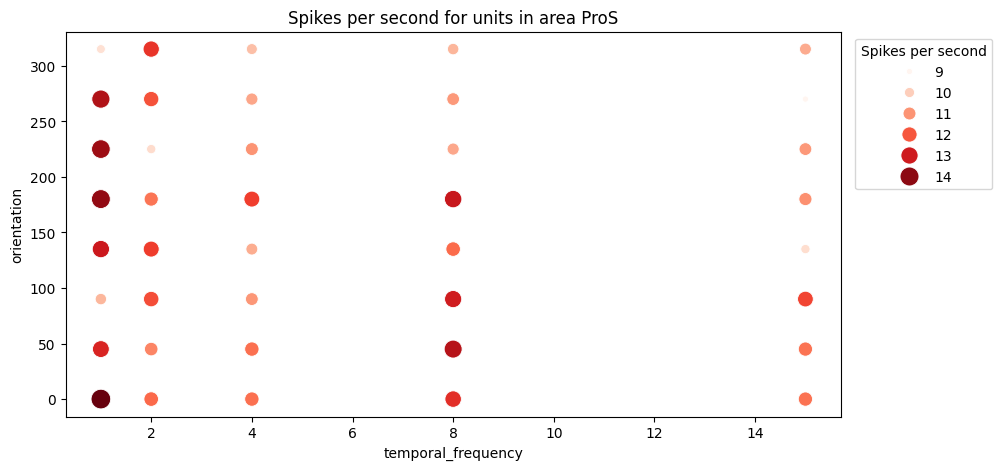

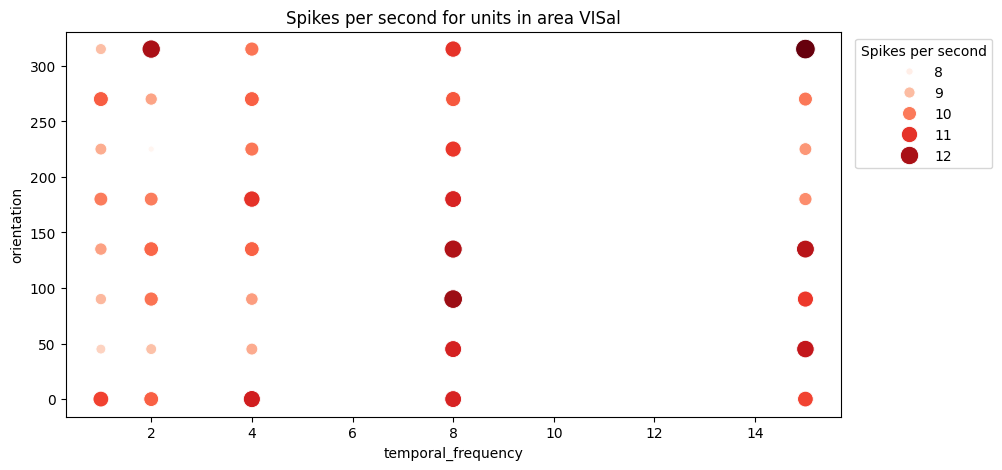

In [17]:
for area in top_areas_variances:
    plot_area_spikes_per_second(raw_dataset, area, frequency)